# Sistemas discretos

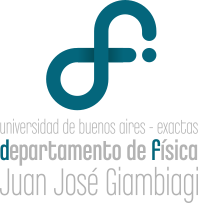  
2021 Pablo Etchemendy  
----

Notebook para calcular las soluciones para sistemas arbitrarios de N masas:
$$
    \mathbf{M} \mathbf{\ddot \Psi} = \mathbf{K} \mathbf{\Psi}
$$

que cumplen condiciones iniciales:
$$
\begin{cases}
\mathbf{\Psi}(t=0) = \mathbf{\Psi_0} \\
\mathbf{\ddot\Psi}(t=0) = \mathbf{\Xi_0}
\end{cases}
$$

## Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib as npm

%matplotlib notebook

## Ingreso de parámetros

Defino los parámetros *de entrada* de mi sistema. Las unidades son libres, si respeto MKS, todas las magnitudes derivadas lo harán también.

Para cada caso, se deben definir **un vector con las masas de cada partícula**, y **una matriz con las interacciones entre las mismas**. Además debo definir las condiciones iniciales y los tiempos en los que quiero graficar la solución.

### *Template* para agregar nuevos casos 

In [ ]:
# M = # vector de masas
# K = # matriz de interacciones
# psi_0 = # vector columna con posiciones iniciales de cada masa
# xi_0 = # vector columna con velocidades iniciales de cada masa
# t = # vector de tiempos para mostrar la solución

### Caso base

Dos masas iguales unidas entre sí, y a puntos fijos en los costados, mediante tres resortes iguales. Mis parámetros básicos son la masa $m$ y la constante elástica $k$, a partir de ellos armo los parámetros requeridos.

In [ ]:
m = 2.  # unidades mks = [kg]
k = 2.  # unidades mks = [N/m]

#### Vector de masas
Defino un vector cuyo elemento $n$ contiene el valor de la masa enésima. Para esto empleo un array 1D (que tendrá dos elementos ya que quiero tener dos masas).

(Nota: array es una manera de almacenar datos multidimensionales en numpy; lo usaremos para representar tanto vectores como matrices).

In [ ]:
# El comando ones de numpy me permite generar un array 1D con N = 2 elementos
# que valen 1. Multiplico por el escalar m para que tomen el valor requerido.
# (La multiplicación es equivalente a la de un escalar y un vector).
m_vector = m*np.ones(2)

# Veamos el resultado
m_vector

In [ ]:
# Para acceder a los elementos uso notación de corchetes. El primer elemento
# corresponde al índice 0:
m_vector[0]

In [ ]:
# El segundo elemento corresponde al índice 1 (y así hasta el índice N-1)
m_vector[1]

In [ ]:
# Muestro el atributo ndim del array; confirmo que es 1D
m_vector.ndim

In [ ]:
# Muestro el atributo shape del array; confirmo que tiene dos elementos
m_vector.shape

In [ ]:
# Otro atributo que puede ser útil es útil es size, me da la cantidad de
# elementos del array
m_vector.size

#### Matriz de interacciones (o de rigidez)

Defino una matriz cuyo elemento $(i,j)$ contiene el coeficiente elástico correspondiente al efecto del desplazamiento de la masa $j$ sobre la aceleración de la masa $i$, **con el signo correspondiente**. Es un array 2D, de dimensiones 2x2:

In [ ]:
# El comando array me permite definir matrices y vectores de dimensiones
# arbitrarias, en este caso escribo explícitamente sus elementos usando
# notación de corchetes, y luego multiplico por el escalar k para que la
# matriz tenga el valor requerido.
K = k*np.array([[-2., 1.],[ 1., -2.]])

K

In [ ]:
# Para acceder a los elementos de una matriz uso notación de corchetes con
# dos índices, el primero corresponde a la fila, el segundo a la columna,
# comenzando desde 0
print(K[0,0]) # primer elemento de la diagonal
print(K[0,1])
print(K[1,0])
print(K[1,1])

# Nota: uso print para poder tener varias salidas en una misma celda del notebook

In [ ]:
# También puedo acceder a una fila o columna de la matriz usando notación de
# corchetes con un único índice:
print(K[:,0]) # primera columna
print(K[:,1])
print(K[0,:]) # primera fila
print(K[1,:])

In [ ]:
# Podemos obtener los atributos de estos arrays de la siguiente manera:
print(K[0,:].shape)
print(K[0,:].ndim)
print(K[0,:].size)

# lo cual nos permite comprobar que se trata de arrays 1D

In [ ]:
K.ndim      # dimensiones

In [ ]:
K.shape     # forma

In [ ]:
K.size      # cantidad de elementos

#### Condiciones iniciales

Defino los vectores $\mathbf{\Psi_0}$ y $\mathbf{\Xi_0}$ a partir de la posición y velocidad inicial de cada masa.


In [ ]:
# Aparto una masa de su equilibrio, sistema parte del reposo
pos_masa_1 = 1
pos_masa_2 = 0
vel_masa_1 = 0
vel_masa_2 = 0

Voy a escribir los vectores $\mathbf{\Psi_0}$ y $\mathbf{\Xi_0}$ como vectores columna; para esto debo definirlas como arrays 2D, de dimensiones 2x1:

(Para arrays 1D no existe la distinción entre vector fila y columna) 

In [ ]:
# Uso el comando array pero agregando el parametro ndmin=2, y luego uso el atributo T
# que me da la transpuesta (ya que la instrucción por si sola me da un vector fila)
psi_0 = np.array([pos_masa_1, pos_masa_2], ndmin = 2).T          # desplazamientos iniciales

psi_0

In [ ]:
xi_0 = np.array([vel_masa_1, vel_masa_2], ndmin = 2).T          # velocidades iniciales

xi_0

In [ ]:
# Chequeo que la forma corresponde a vectores columna
print(psi_0.shape)
print(xi_0.shape)

#### Tiempos

Defino un vector que contiene los tiempos en los que quiero graficar la solución. Debo indicar los tiempos inicial y final, y la cantidad de puntos que quiero graficar. Uso un array 1D.

In [ ]:
t_min     = 0.
t_max     = 10.
n_samples = 1001
t         = np.linspace(t_min, t_max, n_samples)

t

### Ejercicio 6

In [2]:
alfa = 2/3  # alfa me permite controlar el desbalance entre masas
m = 1.
k = 1.

m_vector = m*np.array([1, alfa])
K = k*np.array([[-2., 1.], [1., -1. ]])

psi_0 = np.array([1.,0.], ndmin = 2).T
xi_0  = np.array([0.,0.], ndmin = 2).T

t = np.linspace(0, 10, 10000)

### Ejercicio 7

In [ ]:
alfa = 1  # alfa me permite controlar el desbalance entre masas
m = 1.
k = 1e-1
l = 1.    # \_ parametros de los pendulos
g = 10.   # /

m_vector = m*np.array([1, alfa])
K = k*np.array([[-1., 1.], [1., -1. ]]) + m*g/l*np.array([[-1., 0], [0, -1. ]])

psi_0 = np.array([0.,0.], ndmin = 2).T
xi_0  = np.array([1.,-1.], ndmin = 2).T

t = np.linspace(0, 100, 200000)

### Ejercicio 8

In [ ]:
alfa = 1  # alfa me permite controlar el desbalance entre masas
m  = 1.
k1 = 1.
k2 = k1/10

m_vector = m*np.array([1, alfa])
K = np.array([[-k1-k2, k2], [k2, -k1-k2]])

psi_0 = np.array([0.,0.], ndmin = 2).T
xi_0  = np.array([1.,0.], ndmin = 2).T

t = np.linspace(0, 100, 200000)

### Ejercicio 11 (N masas acopladas con extremos fijos)

In [32]:
N = 20
m = 1
k = 2

m_vector = m*np.ones(N)              # vector de masas

# K es una matriz tridiagonal
K = -2*k*np.diag(np.ones(N)) + k*np.diag(np.ones(N-1),1) + k*np.diag(np.ones(N-1),-1)

psi_0 = np.array(np.zeros(N), ndmin = 2).T
xi_0  = np.array(np.zeros(N), ndmin = 2).T
psi_0[0] = 1.

t = np.linspace(0, 10, 10000)

### Ejercicio 11 modificado (extremo derecho libre)

In [ ]:
# heredo los parámetros originales y modifico el extremo derecho en la matriz K
K[N-1,N-1]=-k

### Ejercicio 12 (N péndulos acoplados con extremos mixtos)

In [ ]:
N = 10
m = 1
k = 2
l = 1
g = 10

m_vector = m*np.ones(N)              # vector de masas

K_pendulos = -m*g/l*np.diag(np.ones(N))
K_resortes = -2*k*np.diag(np.ones(N)) + k*np.diag(np.ones(N-1),1) + k*np.diag(np.ones(N-1),-1)
K_resortes[N-1,N-1] = -k

K = K_pendulos + K_resortes

psi_0 = np.array(np.zeros(N), ndmin = 2).T
xi_0  = np.array(np.zeros(N), ndmin = 2).T
psi_0[0] = 1.

t = np.linspace(0, 10, 10000)

### 3 masas (2021)

In [2]:
N=3
m=1
k=1

m_vector = m*np.ones(N)              # vector de masas

# K es una matriz tridiagonal
K = -2*k*np.diag(np.ones(N)) + k*np.diag(np.ones(N-1),1) + k*np.diag(np.ones(N-1),-1)

psi_0 = np.array(np.zeros(N), ndmin = 2).T
xi_0  = np.array(np.zeros(N), ndmin = 2).T

# condicion inicial solo en las velocidades
xi_0[0] = -1.
xi_0[2] = 1.


t = np.linspace(0, 10, 10000)

## Parámetros derivados

In [3]:
# Cantidad de masas
n_masas   = np.size(m_vector)
# Cantidad de samples para el gráfico
n_samples = t.size

## Chequeo de parámetros

Cuando un código tiene muchos parámetros de entrada, es conveniente tener una sección donde se verifique que los mismos sean consistentes. Enumeramos algunos chequeos que pueden ser útiles:

1) Consistencia entre las dimensiones de la matriz de interacciones y la cantidad de masas; ídem para los vectores con las condiciones iniciales.

2) La matriz de interacciones debe ser cuadrada.

3) Todos los parámetros deben ser reales; las masas además deben ser positivas.

4) La diagonal de la matriz de interacciones debe ser negativa para asegurar que las masas sientan fuerzas restitutivas.

Si bien en algunos casos estos problemas pueden generar un error durante la ejecución del código, en otros no, por lo que si no realizamos un chequeo, solo podremos darnos cuenta al notar inconsistencias en los resultados generados.

A continuación mostramos algunas instrucciones para realizar estos chequeos (hay que refinarlas para casos con muchas masas)

In [45]:
print(n_masas)
print(m_vector.shape)
print(K.shape)
print(psi_0.shape)
print(xi_0.shape)

3
(3,)
(3, 3)
(3, 1)
(3, 1)


In [46]:
m_vector > 0

array([ True,  True,  True])

In [ ]:
np.diagonal(K) < 0

In [ ]:
print(np.iscomplex(m_vector))
print(np.iscomplex(K))
print(np.iscomplex(psi_0))
print(np.iscomplex(xi_0))

## Solución del sistema libre

### Autovalores y autovectores

Antes de plantear la solución, voy a definir una matriz diagonal cuyos elementos representan las masas de cada partícula. Hago esto para poder despejar las masas fácilmente usando álgebra de matrices

$$ \mathbf{M} = \begin{bmatrix} m_1 & & 0 \\  & \ddots \\ 0 & & m_N \end{bmatrix} $$

Para despejar las masas obtengo la matrix inversa:

$$ \mathbf{\ddot \Psi} = \mathbf{M^{-1}} \mathbf{K} \mathbf{\Psi} = \mathbf{\Omega} \mathbf{\Psi} $$ 

El sistema se resuelve a partir de plantear la solución de modos normales:

$$ \mathbf{\Psi} = \mathbf{a} \exp(i \omega t) $$

en la cual $\mathbf{a}$ y $\omega$ son, respectivamente, un vector y un escalar a determinar. Los mismos se obtienen resolviendo el problema de autovalores y autovectores sobre la matriz $\mathbf{\Omega}$:

$$ -\omega^2 \mathbf{a} = \mathbf{\Omega} \mathbf{a}  = \lambda \mathbf{a} $$

al cual se llega insertando la solución propuesta en la ecuación diferencial.

In [4]:
# La instruccion diag me permite armar una matriz diagonal a partir de un array 1D
M = np.diag(m_vector)

M

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
# Esta instruccion me da la matriz inversa, notar que es una matriz diagonal cuyos
# elementos son 1/m_1 ... 1/m_N
M_inv = np.linalg.inv(M)

M_inv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
# La instrucción dot me permite multiplicar matrices según las reglas del álgebra
# de matrices
W = np.dot(M_inv, K)

W

array([[-2.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -2.]])

In [7]:
# Esta instrucción me permite obtener los autovalores y autovectores normalizados de W
l, A = np.linalg.eig(W)

print(l)  # vector de autovalores
print(A)  # matriz de autovectores columna

[-3.41421356 -2.         -0.58578644]
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -4.05405432e-16  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


In [8]:
# Accedo al primer autovalor 
l[0]

-3.4142135623730914

In [52]:
# Accedo al primer autovector
A[:,0]

array([ 0.5       , -0.70710678,  0.5       ])

Para obtener las frecuencias, uso que:

$$ \omega_i = \sqrt{-\lambda_i} $$

In [10]:
w = np.sqrt(-l)

w

array([1.84775907, 1.41421356, 0.76536686])

In [11]:
# No siempre las frecuencias quedan ordenadas de menor a mayor, uso argsort para 
# reordenar todo
indices_ordenados = np.argsort(w)
l = l[indices_ordenados]
w = w[indices_ordenados]
A = A[:,indices_ordenados]

# ademas voy a hacer que todos los autovectores tengan su primer elemento positivo
#A = A*npm.repmat(np.sign(A[0,:]), n_masas, 1)

Voy a mostrar las frecuencias del sistema ordenadas:

0.7653668647301795
1.8477590650225726


1.2715533031636115

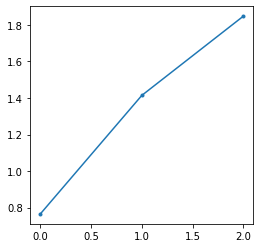

In [55]:
# Completar nombres de ejes, etc.
fig2, ax2 = plt.subplots()
fig2.set_size_inches(4, 4)
ax2.plot(w, marker='.')

print(np.min(w))
print(np.max(w))

np.log(np.max(w) / np.min(w)) / np.log(2)

Y ahora muestro los autovectores en un gráfico de colores (útil para sistemas de muchas masas)

array([[ 5.00000000e-01,  7.07106781e-01,  5.00000000e-01],
       [ 7.07106781e-01, -4.05405432e-16, -7.07106781e-01],
       [ 5.00000000e-01, -7.07106781e-01,  5.00000000e-01]])

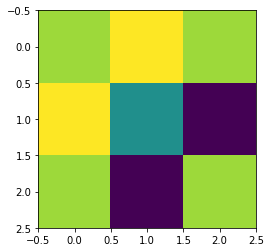

In [12]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(4, 4)

ax1.imshow(A)
A

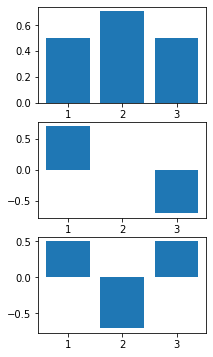

In [13]:
# Muestro hasta los primeros n modos
n = min(10, n_masas)
fig3, ax3 = plt.subplots(nrows=n,ncols=1)
fig3.set_size_inches(3, 2*n)
for i in range(0,n):
    ax3[i].bar([1,2,3],A[:,i])

### Condiciones iniciales

La solución de mi sistema se escribe como:

$$ \mathbf{\Psi} = \sum_{j=1}^N c_j \mathbf{a_j} \exp(i \omega_j t) $$

$$ \mathbf{\dot\Psi} = \Xi = i \sum_{j=1}^N \omega_j c_j \mathbf{a_j} \exp(i \omega_j t) $$

donde $c_j$ son $N$ pesos complejos que se obtienen al plantear las condiciones iniciales. Para hallar los pesos, es necesario tomar parte real en mi solución compleja (evaluada en $t=0$) e igualar a las condiciones iniciales:

$$ \begin{cases}
\mathbf{\Psi_0} = \Re[\mathbf{a_1} c_1 + ... + \mathbf{a_N} c_N ] \\ 
\mathbf{\Xi_0}  = \Re[i \mathbf{a_1} c_1 \omega_1 + ... + i \mathbf{a_N} c_N \omega_N]
 \end{cases}
$$ 

Notar que tenemos tantos pesos como masas en el sistema, a la vez que la cantidad de ecuaciones es el doble que la cantidad de masas; esto se debe a que para cada peso es necesario determinar su parte real y su parte imaginaria. Es decir, para un sistema con $N$ masas, tendremos que hallar $2N$ incógnitas mediante $2N$ ecuaciones. (Para pensar, ¿es posible que este sistema sea indeterminado?)

Voy a expresar este sistema de ecuaciones en notación matricial; para esto voy a usar la matriz de autovectores, la cuál se define como una matriz cuyas columnas corresponden a cada autovector:

$$ \mathbf{A} = \begin{bmatrix} \mathbf{a_1} & ... & \mathbf{a_N} \end{bmatrix} $$

En notación matricial el sistema se expresa:

$$ \begin{cases}
\mathbf{\Psi_0} = \begin{bmatrix} \mathbf{a_1} & ... & \mathbf{a_N} \end{bmatrix} 
                  \begin{bmatrix} \Re[c_1] \\ \vdots \\ \Re[c_N] \end{bmatrix} \\
\mathbf{\Xi_0}  = \begin{bmatrix} \mathbf{a_1} & ... & \mathbf{a_N} \end{bmatrix} 
                  \begin{bmatrix} -\Im[c_1] \omega_1 \\ \vdots \\ -\Im[c_N] \omega_N \end{bmatrix}
 \end{cases}
$$

Debemos invertir la matriz de autovectores para poder despejar los pesos. Por suerte, las partes reales e imaginarias están desacopladas. 

Usando dicha matriz inversa, obtenemos

$$ \begin{cases}
\begin{bmatrix} \Re[c_1] \\ \vdots \\ \Re[c_N] \end{bmatrix} = \mathbf{A}^{-1} \mathbf{\Psi_0}\\
\begin{bmatrix} \Im[c_1] \omega_1 \\ \vdots \\ \Im[c_N] \omega_N \end{bmatrix} = - \mathbf{A}^{-1} \mathbf{\Xi_0}
\end{cases}
$$

Notar que en la segunda condición se puede despejar el vector de partes imaginarias de los pesos definiendo una matriz diagonal con las frecuencias angulares:

$$ \bar{\omega} = \begin{bmatrix} \omega_1 & & 0 \\ & \ddots & \\ 0 & & \omega_N \end{bmatrix} $$

de modo que:

$$ \begin{bmatrix} \omega_1 & & 0 \\ & \ddots & \\ 0 & & \omega_N \end{bmatrix} \begin{bmatrix} \Im[c_1] \\ \vdots \\ \Im[c_N] \end{bmatrix} = - \mathbf{A}^{-1} \mathbf{\Xi_0} $$

Para despejar invertimos esta matriz y obtenemos:

$$ \begin{bmatrix} \Im[c_1] \\ \vdots \\ \Im[c_N] \end{bmatrix} = - \begin{bmatrix} 1/\omega_1 & & 0 \\ & \ddots & \\ 0 & & 1/\omega_N \end{bmatrix} \mathbf{A}^{-1} \mathbf{\Xi_0} = \bar{\omega}^{-1} \mathbf{A}^{-1} \mathbf{\Xi_0} $$

(Al hacer esto hay que tener cuidado con los modos de frecuencia 0).

In [14]:
# Obtengo la inversa de la matriz de autovectores
A_inv = np.linalg.inv(A)

print(A)
print(A_inv)

[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01 -4.05405432e-16 -7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01 -4.71027738e-16 -7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


In [15]:
# Para hallar la parte real de los pesos simplemente aplico la matriz
# inversa de A a la condición inicial sobre las posiciones
c_real = np.dot(A_inv, psi_0)

c_real

array([[0.],
       [0.],
       [0.]])

In [16]:
# Para la parte compleja hay que aplicar dos matrices a la condicion
# inicial sobre las velocidades
w_matriz     = np.diag(w)
w_matriz_inv = np.linalg.inv(w_matriz)
c_imag = -np.dot(w_matriz_inv, np.dot(A_inv, xi_0))

c_imag

array([[-2.17586443e-16],
       [ 1.00000000e+00],
       [-4.80678697e-16]])

In [17]:
# Finalmente escribimos los pesos complejos
c = c_real + 1j*c_imag

c

array([[0.-2.17586443e-16j],
       [0.+1.00000000e+00j],
       [0.-4.80678697e-16j]])

In [18]:
# Chequeo posición inicial
np.real(np.dot(A, c))

array([[0.],
       [0.],
       [0.]])

In [19]:
# Chequeo velocidad inicial
np.real(1j*np.dot(A, np.dot(np.diag(w), c)))

array([[-1.00000000e+00],
       [ 6.30498112e-17],
       [ 1.00000000e+00]])

### Solución en función del tiempo

La parte que nos queda es la de evaluar la solución para los puntos del tiempo elegidos.

In [20]:
# Defino las matrices que contendran la solucion a lo largo del tiempo, cada
# fila representa una masa, y cada columna un sample de tiempo
psi = np.zeros([n_masas, n_samples])        # \_ ambas son arrays 2D
xi  = np.zeros([n_masas, n_samples])        # /

psi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
psi.shape

(3, 10000)

In [22]:
# Voy calculando la solución para cada masa
for i in range(0, n_masas):
    
    # defino al autovector i-ésimo como un vector columna
    ai = A[:,i]
    ai.shape = (n_masas,1)
    
    # uso npm.repmat para expandir el autovector y la exponencial a una matriz
    # con n_masas filas y n_samples columnas
    aux = c[i]*npm.repmat(ai,1,n_samples)*npm.repmat(np.exp(1j*w[i]*t), n_masas, 1)
    
    # sumo término a término en posición y velocidad
    psi = psi + aux
    xi  = xi  + aux*1j*w[i]
    

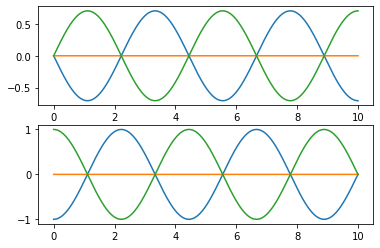

In [23]:
# Grafico psi y xi versus t para hasta 10 masas
n = min(5, n_masas)
fig4, ax4 = plt.subplots(nrows=2,ncols=1)
# transpongo para poder graficar las dos masas juntas
ax4[0].plot(t, np.real(psi[0:n,:].T))               # posicion de ambas masas, uso slice notation
ax4[1].plot(t, np.real( xi[0:n,:].T))               # velocidades de ambas masas


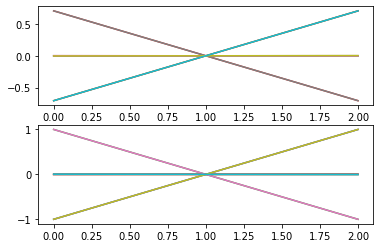

In [24]:
# Grafico el movimiento (psi) y la velocidad (xi) colectives para 10 instantes
# de tiempo entre t_min y t_max (útil para sistemas de muchas masas)
fig5, ax5 = plt.subplots(nrows=2,ncols=1)
samples = np.round(np.linspace(0, len(t) - 1, 10)).astype(int)

ax5[0].plot(np.real(psi[:,samples])) 
ax5[1].plot(np.real(xi[:,samples])) 

## Coordenadas de modos normales

Podemos expresar la solución en coordenadas de modos normales. Estas coordenadas sirven para representar al movimiento colectivo del sistema con una única coordenada. La transformación se realiza mediante la matriz de autovectores inversa:

$$ \tilde{\mathbf{\Psi}} = \mathbf{A}^{-1} \mathbf{\Psi} $$

Para volver a coordenadas de masas:

$$ \mathbf{\Psi} = \mathbf{A} \tilde{\mathbf{\Psi}} $$

Esta transformación aplicada a la matriz $\mathbf{\Omega}$ nos permite diagonalizar el sistema:

$$ \mathbf{A}^{-1} \mathbf{\Omega} \mathbf{A} = \bar{\omega} $$

Es decir, nos permite obtener una ecuación diferencial para la coordenada del modo i-ésimo ($\tilde{\Psi}_i$) que es independiente de las demás:

$$ \ddot {\tilde{ \Psi}}_i + \omega_i^2 \tilde{\Psi }_i = 0 $$

Notar que la matriz $\bar{\omega}$ es la misma que habíamos empleado antes, y que cada modo tiene la dinámica de un oscilador armónico simple con frecuencia $\omega_i$.

In [ ]:
# obtenemos la matriz omega
w_matriz_2 = np.dot(A.T, np.dot(W, A))

print(w_matriz)
print(np.sqrt(np.abs(w_matriz_2)))

# Tomo valor absoluto sobre la matriz ya que por cuestiones de redondeo, algunos
# elementos pueden ser positivos y otros negativos (cuando en realidad debe ser
# diagonal positiva). Para futuros cálculos uso la matriz armada "a mano" w_matriz

La solución para estas coordenadas se escribe:

$$ \tilde{\mathbf{\Psi}} = \mathbf{A}^{-1}\mathbf{\Psi} = \mathbf{A}^{-1} \sum_{j=1}^N c_j \mathbf{a_j} \exp(i \omega_j t) $$

$$ \dot{\tilde{\mathbf{\Psi}}} =  i \mathbf{A}^{-1} \sum_{j=1}^N \omega_j c_j \mathbf{a_j} \exp(i \omega_j t) $$



In [ ]:
# Defino arrays para la solucion de modos (en posicion y velocidad)
# Estos arrays son matrices con tantas filas como masas, y tantas
# columnas como instantes de tiempo sampleados
psi_modos = np.zeros([n_masas, n_samples])        # \_ arrays compañeros de los arrays psi y xi
xi_modos  = np.zeros([n_masas, n_samples])        # /


# Vamos a recorrer la solución de masas a lo largo del tiempo
# y a convertir en la solución de modos usando la matriz A

for i in range(0, n_samples):
    psi[:,i] = np.dot(A_inv, psi[:,i])
    xi[:,i]  = np.dot(A_inv,  xi[:,i])

psi

In [ ]:
# Grafico psi_modos y xi_modos versus t para hasta 10 modos
n = min(5, n_masas)
fig_modos, ax_modos = plt.subplots(nrows=2,ncols=1)
# transpongo para poder graficar las dos masas juntas
ax_modos[0].plot(t, np.real(psi[0:n,:].T))               # posicion de ambas masas, uso slice notation
ax_modos[1].plot(t, np.real( xi[0:n,:].T))               # velocidades de ambas masas


## Energía

Hacer

## Sistema forzado¶


Vamos a resolver el comportamiento del sistema cuando es excitado por una fuerza externa armónica aplicada sobre una o varias de las masas. La ecuación diferencial es:

$$ \mathbf{M} \mathbf{\ddot \Psi} = \mathbf{K} \mathbf{\Psi} + \mathbf{F_\text{ext}} \cos(\omega_\text{ext} t)$$


$\mathbf{F}_\text{ext}$ es un vector columna constante que contiene la amplitud de la fuerza aplicada sobre la masa enésima. En principio es un vector real, cuyos elementos pueden ser positivos pero también negativos (pensar por qué). Pero también podemos permitir que sea un vector complejo, en ese caso las fases complejas representan el desfasaje en la excitación de cada masa.

### Parámetros

In [ ]:
# incluyo una disipación despreciable en el sistema, para evitar
# divisiones por cero en las amplitudes forzadas
gamma = 1e-3 # chequear que este valor es verdaderamente despreciable para la configuración del sistema

F_ext = np.array(np.zeros(n_masas), ndmin=2).T
F_ext[0] = 1
F_ext[1] = 0

w_ext = 1.1 # uso la frecuencia del modo fundamental

F_ext

### Solución 

Despejamos la matriz de masas:

$$ \mathbf{\ddot \Psi} = \mathbf{M}^{-1} \mathbf{K} \mathbf{\Psi} + \mathbf{M}^{-1} \mathbf{F_\text{ext}} \cos(\omega_\text{ext} t)$$

$$ \mathbf{\ddot \Psi} = \mathbf{\Omega} \mathbf{\Psi} + \mathbf{a_\text{ext}} \cos(\omega_\text{ext} t)$$

lo que nos permite transformar el forzante en un término de aceleraciones en vez de fuerzas.

Para resolver el sistema vamos a utilizar la matriz de autovectores inversa, esto nos permite transformar las coordenadas de masas en coordenadas de modos: 

$$ \mathbf{A}^{-1} \mathbf{\ddot \Psi} = \mathbf{A}^{-1} \mathbf{\Omega} \mathbf{\Psi} + \mathbf{A}^{-1} \mathbf{a_\text{ext}} \cos(\omega_\text{ext} t)$$

$$ \mathbf{A}^{-1} \mathbf{\ddot \Psi} = \mathbf{A}^{-1} \mathbf{\Omega} \mathbf{A} \mathbf{A}^{-1} \mathbf{\Psi} + \mathbf{A}^{-1} \mathbf{a_\text{ext}} \cos(\omega_\text{ext} t)$$

$$ \ddot{\mathbf{\tilde{ \Psi}} }= - \bar{\omega}^2 \mathbf{\tilde{\Psi}} + \mathbf{\tilde{a}_\text{ext}} \cos(\omega_\text{ext} t)$$

donde los símbolos con ~ indican vectores transformados a la base de modos normales, y donde:

$$ \bar{\omega}^2 = \begin{bmatrix} \omega_1^2 & & 0 \\ & \ddots & \\ 0 & & \omega_N^2 \end{bmatrix} $$

Al ser esta matriz diagonal, las ecuaciones diferenciales para cada modo están desacopladas. Esto significa que la solución para la coordenada de modo i-ésima está dada por la solución de un oscilador armónico simple forzado:

$$ \tilde{\Psi}_i^\text{part} = b_i^\text{el}\cos(\omega_\text{ext} t ) + b_i^\text{ab}\sin(\omega_\text{ext} t ) $$

donde $b_i^\text{el}$ y $b_i^\text{ab}$ representan las amplitudes elástica y absorbente para el modo i-ésimo en función de los parámetros del sistema y de $\omega_\text{ext}$:

$$ b_i^\text{el} = \tilde{a}_{\text{ext},i} \frac{\omega_i^2 - \omega_\text{ext}^2 }{(\omega_i^2 - \omega_\text{ext}^2 )^2 + (\omega_\text{ext} \gamma)^2}$$

$$ b_i^\text{ab} = \tilde{a}_{\text{ext},i} \frac{ \gamma \omega_\text{ext} }{(\omega_i^2 - \omega_\text{ext}^2 )^2 + (\omega_\text{ext} \gamma)^2}$$

Como estamos trabajando en el régimen en que la disipación es despreciable:

$$ b_i^\text{el} \sim \frac{\tilde{a}_{\text{ext},i} }{\omega_i^2 - \omega_\text{ext}^2} = b_i$$

$$ b_i^\text{ab} \sim 0$$

En notación vectorial, la solución para las coordenadas de modos es:

$$ \mathbf{\tilde{\Psi}_\text{part}} = \mathbf{b} \cos(\omega_\text{ext} t ) $$

la cual se puede transformar a las coordenadas de partículas usando la matriz de autovectores columna:

$$ \mathbf{\Psi_\text{part}} = \mathbf{A}\mathbf{\tilde{\Psi}_\text{part}} = \mathbf{A} \mathbf{b} \cos(\omega_\text{ext} t ) $$

In [ ]:
# Obtengo el vector de aceleraciones producidas por la fuerza externa
a_ext = np.dot(M_inv, F_ext)

a_ext

In [ ]:
# Transformo el vector de aceleraciones a la base de modos normales
a_ext_modos = np.dot(A_inv, a_ext)

a_ext_modos

In [ ]:
# Obtengo las amplitudes para la solucion de modos normales forzados

# primero armo un vector que contiene los coeficientes de frecuencias
# y disipacion de las amplitudes forzadas
aux = (w**2 - w_ext**2) / ((w**2 - w_ext**2)**2 + (gamma*w_ext)**2)

# con ese vector armo una matriz diagonal
aux = np.diag(aux)

# aplico esa matriz a las aceleraciones externas aplicadas sobre los modos
b_modos = np.dot(aux, a_ext_modos)

b_modos

In [ ]:
# Transformo a las amplitudes de las masas
b_masas = np.dot(A, b_modos)

b_masas

In [ ]:
# La solución estacionaria se escribe en una sola linea para la posicion y
# otra para la velocidad
psi_forzado =  npm.repmat(b_masas,1,n_samples)*npm.repmat(np.cos(w_ext *t), n_masas, 1)
xi_forzado = -npm.repmat(b_masas,1,n_samples)*npm.repmat(np.sin(w_ext *t), n_masas, 1)*w_ext

In [ ]:
# Grafico psi y xi versus t para hasta 10 masas
n = min(5, n_masas)
fig6, ax6 = plt.subplots(nrows=2,ncols=1)
# transpongo para poder graficar las dos masas juntas
ax6[0].plot(t, psi_forzado[0:n,:].T)               # posicion de ambas masas, uso slice notation
ax6[1].plot(t,  xi_forzado[0:n,:].T)               # velocidades de ambas masas

In [ ]:
# Ejercicio 13: dos masas cuando se fuerza una sola de ellas
# armado a mano
psi_masa_1 = F_ext[0] / 2 / m *np.cos(w_ext *t) *(1/(w[0]**2 - w_ext**2) + 1/(w[1]**2 - w_ext**2))
psi_masa_2 = F_ext[0] / 2 / m *np.cos(w_ext *t) *(1/(w[0]**2 - w_ext**2) - 1/(w[1]**2 - w_ext**2))

fig7, ax7 = plt.subplots(nrows=1,ncols=1)
ax7.plot(t, psi_masa_1)
ax7.plot(t, psi_masa_2)
